In [13]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
smarket = pd.read_csv("data/smarket.csv", index_col=0)

In [6]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


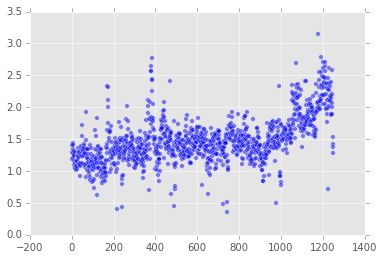

In [11]:
plt.scatter(smarket.index, smarket.Volume, alpha=0.5)

In [16]:
glm_fit = smf.glm('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=smarket, family=sm.families.Binomial()).fit()
glm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Sun, 30 Aug 2015   Deviance:                       1727.6
Time:                                          01:33:01   Pearson chi2:                 1.25e+03
No. Iterations:                                       6                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1260      0.241      0.523      0.601        -0.346     0.598
Lag1           0.0731      0.050      1.457      0.145        -0.025     0.171
Lag2           0.0423      0.050      0.845      0.398        -0.056     0.140
Lag3          -0.0111      0.050     -0.222      0.824        -0.109     0.087
Lag4          -0.0094      0.050     -0.187      0.851        -0.107     0.089
Lag5          -0.0103      0.050     -0.208      0.835        -0.107     0.087
Volume        -0.1354      0.158     -0.855      0.392        -0.446     0.175
==============================================================================
"""

In [19]:
glm_probs = glm_fit.predict()
1-glm_probs[:10] #Up is 0, Down is 1

array([ 0.50708413,  0.48146788,  0.48113883,  0.51522236,  0.51078116,
        0.50695646,  0.49265087,  0.50922916,  0.51761353,  0.48883778])

In [27]:
# confusion matrix
import numpy as np
pred = np.array(glm_probs > 0.5, dtype=float)
table = np.histogram2d(smarket['Direction'] == "Down", pred, bins=2)[0]
table

array([[ 507.,  141.],
       [ 457.,  145.]])

In [ ]:
#create dummy variable for category 


In [ ]:
# using sklearn LogisiticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit()
